In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_datareader
import datetime
import pandas_datareader.data as web
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import yfinance as yf


In [12]:
#Var ES of one stock
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2020, 1, 1)

ticker = str(input('Enter stock : '))
xstock = yf.download(ticker, start=start, end=end, interval='1d')["Adj Close"]
xstock_change = list(xstock.pct_change().dropna())
xstock_change.sort(reverse=False)

a = round(0.05 * len(xstock_change), 0)
b = a - 1
xstock_var = -xstock_change[int(a)] * 100
SUM = sum(xstock_change[:int(b)])
COUNT = len(xstock_change[:int(b)])
xstock_es = -(SUM / COUNT) * 100

print(str(xstock_var) + "% is the VAR of " + x)
print(str(xstock_es) + "% is the ES of " + x)

Enter stock : SBIN.NS
[*********************100%***********************]  1 of 1 completed
3.597803314175141% is the VAR of SBIN.NS
4.679668980004846% is the ES of SBIN.NS


list

In [14]:
#for comparing of different stocks
y = str(input('Enter stock : '))
ystock = yf.download(y, start=start, end=end, interval='1d')["Adj Close"]
ystock_change = list(ystock.pct_change().dropna())
ystock_change.sort(reverse = False)
c = round(0.05*len(ystock_change),0)
d = c-1
ystock_var = -ystock_change[int(c)]*100
SUM = sum(ystock_change[:int(d)])
COUNT = len(ystock_change[:int(d)])
ystock_es = -(SUM/COUNT)*100
print(str(ystock_var) + str("% is the VAR of " + y))
print(str(ystock_es) + str("% is the ES of " + y))

z = str(input('Enter stock : '))
zstock = yf.download(z, start=start, end=end, interval='1d')["Adj Close"]
zstock_change = list(zstock.pct_change().dropna())
zstock_change.sort(reverse = False)
e = round(0.05*len(ystock_change),0)
f = e-1
zstock_var = -zstock_change[int(e)]*100
SUM = sum(zstock_change[:int(f)])
COUNT = len(zstock_change[:int(f)])
zstock_es = -(SUM/COUNT)*100
print(str(zstock_var) + str("% is the VAR of " + z))
print(str(zstock_es) + str("% is the ES of " + z))

Enter stock : AAPL
[*********************100%***********************]  1 of 1 completed
2.0614010061346555% is the VAR of AAPL
3.8143900424748245% is the ES of AAPL
Enter stock : MSFT
[*********************100%***********************]  1 of 1 completed
1.8847075268149327% is the VAR of MSFT
2.8544073095855644% is the ES of MSFT


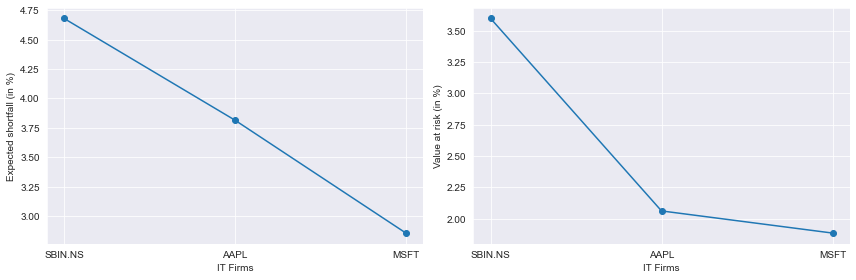

In [15]:
Expected_shortfall = [xstock_es,ystock_es,zstock_es]
VaR = [xstock_var,ystock_var,zstock_var]
Companies = [x,y,z]
#subplots
fig, ax = plt.subplots(1,2,figsize = (12,4))
 
# Accessing each axes object to plot the data through returned array
ax[0].plot(Companies, Expected_shortfall, marker = "o");
ax[0].set_ylabel("Expected shortfall (in %)")
ax[0].set_xlabel("IT Firms")
ax[1].plot(Companies, VaR, marker = "o");
ax[1].set_ylabel("Value at risk (in %)")
ax[1].set_xlabel("IT Firms")
fig.tight_layout()

Red is for SBIN.NS
Green is for AAPL
Pink is for MSFT


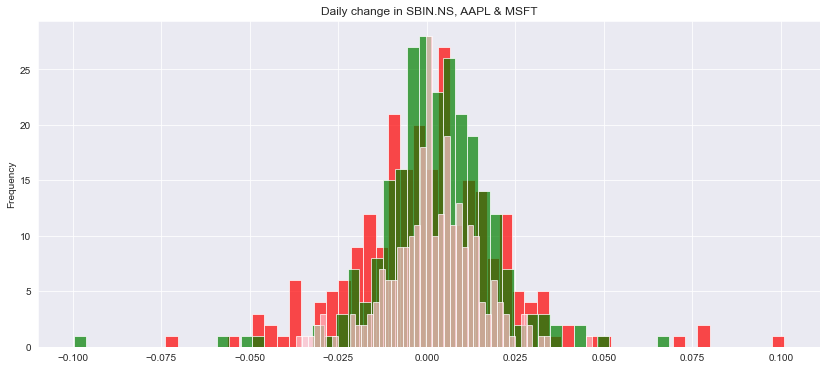

In [16]:
xstock.pct_change().plot.hist(bins = 50,figsize = (14,6),color = "red",alpha = 0.7)
ystock.pct_change().plot.hist(bins = 50,color = "green",alpha = 0.7)
zstock.pct_change().plot.hist(bins = 50,color = "pink", alpha =0.7)
print("Red is for " + x)
print("Green is for " + y)
print("Pink is for " + z)
plt.title("Daily change in " + x +", " + y + " & "+ z);

In [17]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Shock and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Shock
        shock[x] = np.random.normal()*sigma*(dt**(1/2))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

start_price = xstock[-1]
mu = xstock.pct_change().mean()
sigma = xstock.pct_change().std()
for run in range(50):
    stock_monte_carlo(start_price, days, mu, sigma)
    